In [14]:
import os
import json
import glob
import numpy as np

import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cf
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [15]:
file_list = glob.glob(os.path.join('..', 'point', '*.json'))
file_list = sorted(file_list)
file_length = len(file_list)
print(f'Number of files: {file_length}')

Number of files: 84


In [16]:
nn = 1

file_pos = file_list[nn]
pos_la = file_pos.split('/')[-1].split('_')[1]
pos_lo = file_pos.split('/')[-1].split('_')[2]
print(f'LAT pos: {pos_la}, LON pos: {pos_lo}')

with open(file_list[nn], 'r') as f:
    data = json.load(f)

LAT pos: 11, LON pos: 159


In [17]:
data

{'NYs': '[37. 43. 36.]',
 'CYs': '[ 8.78296474 13.09829277 10.0098152 ]',
 'WYs': '[0.88566919 1.34665878 1.03915447]',
 'NYd': '[42. 49. 41.]',
 'CYd': '[ 7.12436551 10.94928781  8.21494294]',
 'WYd': '[0.78562715 1.10773181 0.89953901]',
 'Tr': '[  5  10  20  50 100 200]',
 'mev_d': '[ 54.15975371  62.86769874  71.71356231  83.92209742  93.63025433\n 103.75585099]',
 'mev_s': '[50.09619273 57.50909452 65.07133804 75.4681873  83.63937418 92.0445781 ]',
 'YEARS': '[2020. 2021. 2022.]',
 'gam_d': '0.9792058',
 'gam_s': '0.98078394',
 'beta': 0.8772225080001448,
 'Nd': 43.0,
 'Cd': 8.90900026466649,
 'Wd': 0.9328027124876983,
 'Ns': 38,
 'Cs': 10.821347229381065,
 'Ws': 1.085793427474484,
 'eps_s': 133.38081998386053,
 'alp_s': 1.0014394677164655,
 'eps_d': 116.71245687422898,
 'alp_d': 0.9491921637086044,
 'corr_down_success': True,
 'corr_down_funval': 0.005706482851167305,
 'w_down_funval': 1.1649037290339948e-10,
 'thresh': 1.0,
 'clat': '37.074997',
 'clon': '14.474991'}

In [18]:
mev_d_array = np.fromstring(data['mev_d'].strip('[]'), sep=' ')
mev_s_array = np.fromstring(data['mev_s'].strip('[]'), sep=' ')
Tr = np.fromstring(data['Tr'].strip('[]'), sep=' ')
beta = data['beta']

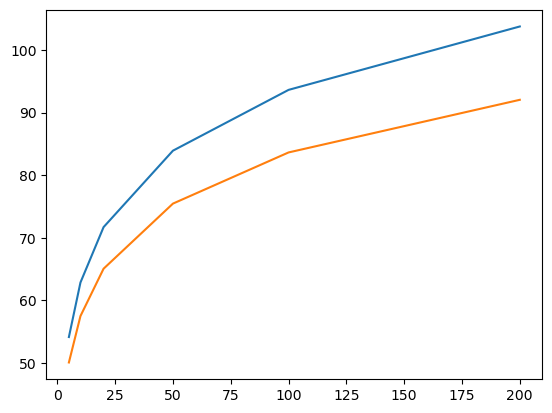

In [19]:
plt.plot(Tr, mev_d_array)
plt.plot(Tr, mev_s_array)

## LOAD CHIRPS

In [20]:
SAT = xr.open_dataset('/media/arturo/T9/Data/Italy/Satellite/CHIRPS/1dy/CHIRPS_Italy_1dy_1981_01_01_2024_06_30.nc')
lat = SAT.lat.values
lon = SAT.lon.values
lon2d, lat2d = np.meshgrid(lon, lat)

lon_min, lon_max, lat_min, lat_max, area, toll = 6.5, 19, 36.5, 48, 'ITALY', 0.002

PRE_data = SAT.sel(lat=slice(lat_min-1.5, lat_max+1.5), lon=slice(lon_min-1.5, lon_max+1.5))
print(np.shape(PRE_data.PRE.values))

del SAT

(15887, 240, 260)


In [21]:
BETA_2d = np.zeros([len(lat),len(lon)])
GAMMA_2d = np.zeros([len(lat),len(lon)])

for nn in range(file_length):
    with open(file_list[nn], 'r') as f:
        tmp = json.load(f)
    beta_ = tmp['beta']
    gamma_ = tmp['beta']

    lat_pos = np.where(lat==float(tmp['clat']))[0][0]
    lon_pos = np.where(lon==float(tmp['clon']))[0][0]

    BETA_2d[lat_pos, lon_pos] = beta_
    GAMMA_2d[lat_pos, lon_pos] = gamma_

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


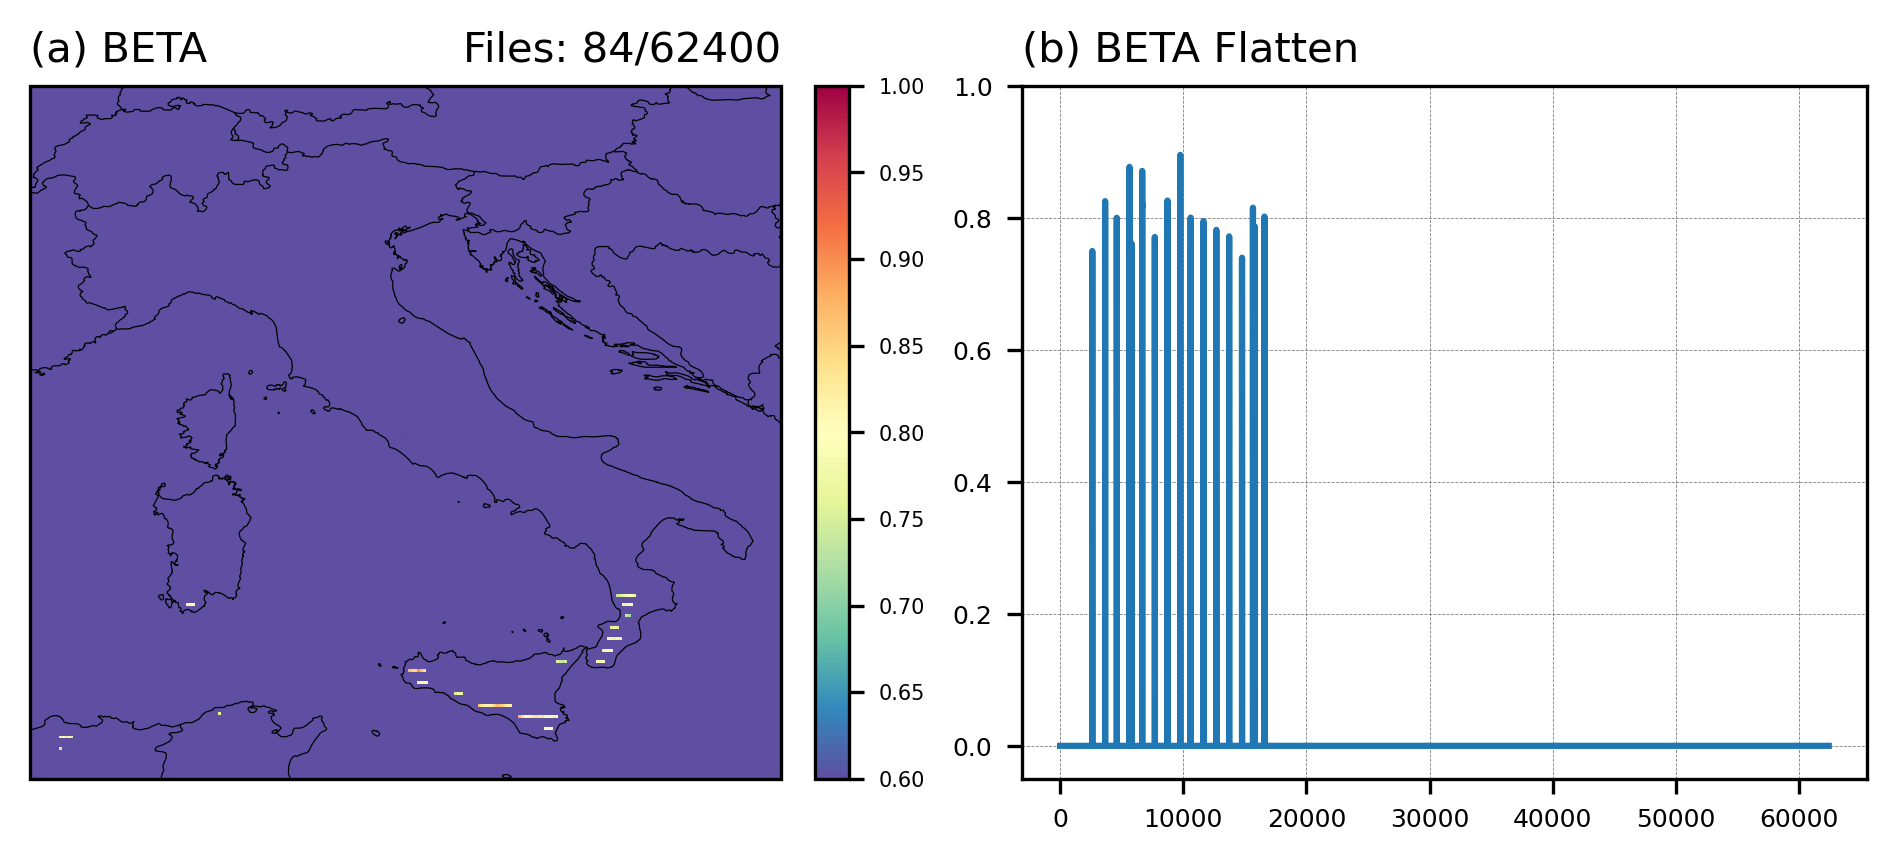

In [22]:
levels = np.arange(0.5,1.1,0.1)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# =============================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.pcolormesh(lon2d, lat2d, BETA_2d, vmin=0.6, vmax=1, cmap=cmap)

ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_title(f'(a) BETA',loc='left',fontsize=10)
ax1.set_title(f'Files: {file_length}/{len(BETA_2d.flatten())}',loc='right',fontsize=10)

cbar = plt.colorbar(a1, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=5)

# =============================================
ax1 = plt.subplot(gs[0, 1])
ax1.plot(BETA_2d.flatten())
ax1.set_ylim(-0.05,1)
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_title(f'(b) BETA Flatten',loc='left',fontsize=10)
ax1.grid(linewidth=0.2, linestyle='--', color='gray')

/home/arturo/anaconda3/envs/AXE/lib/python3.13/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


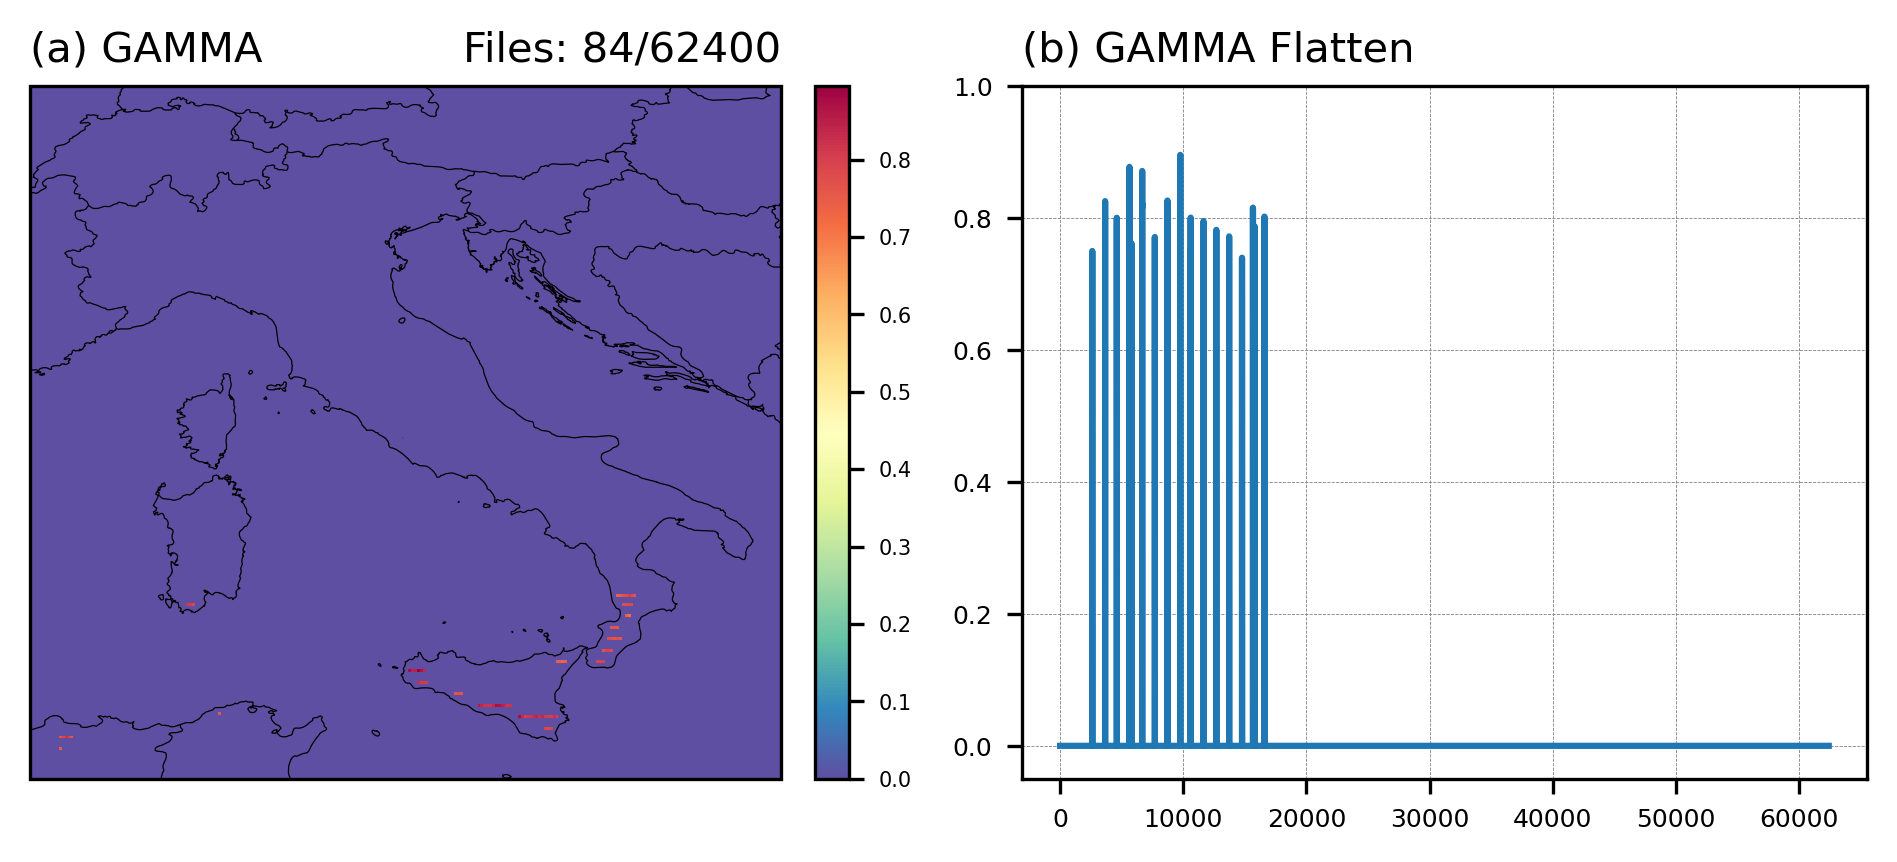

In [25]:
levels = np.arange(0.5,1.1,0.1)

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# =============================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.pcolormesh(lon2d, lat2d, GAMMA_2d, cmap=cmap)

ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_title(f'(a) GAMMA',loc='left',fontsize=10)
ax1.set_title(f'Files: {file_length}/{len(GAMMA_2d.flatten())}',loc='right',fontsize=10)

cbar = plt.colorbar(a1, fraction=0.045, pad=0.04)
cbar.ax.tick_params(labelsize=5)

# =============================================
ax1 = plt.subplot(gs[0, 1])
ax1.plot(GAMMA_2d.flatten())
ax1.set_ylim(-0.05,1)
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.set_title(f'(b) GAMMA Flatten',loc='left',fontsize=10)
ax1.grid(linewidth=0.2, linestyle='--', color='gray')